In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import Tuple

In [2]:
# if not os.path.exists('../data/precipitation_data.csv'):
#         download_precip_data()
# else:
#   ...
precip = pd.read_csv("../data/precipitation_data.csv", index_col=0)
precip

C:\Users\adamp\AppData\Local\Temp\ipykernel_42128\2676537958.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  precip = pd.read_csv("../data/precipitation_data.csv", index_col=0)


,station_code,station_name,year,month,day,24h_precipitation_mm,SMDB_status,precip_type,snow_cover_cm,PKSN_status,fresh_snow_cover_cm,HSS_status,snow_type_code,GATS_status,snow_cover_type_code,RPSN_status
0,249180020,WARSZOWICE,1991,1,2,5.5,NaN,W,0,8.0,0,8.0,NaN,8.0,NaN,8.0
1,249180020,WARSZOWICE,1991,1,3,3.5,NaN,W,0,8.0,0,8.0,NaN,8.0,NaN,8.0
2,249180020,WARSZOWICE,1991,1,4,1.9,NaN,W,0,8.0,0,8.0,NaN,8.0,NaN,8.0
3,249180020,WARSZOWICE,1991,1,7,3.3,NaN,W,0,8.0,0,8.0,NaN,8.0,NaN,8.0
4,249180020,WARSZOWICE,1991,1,10,0.0,NaN,W,0,8.0,0,8.0,NaN,8.0,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14122,254230020,SEJNY,2023,12,26,8.3,NaN,S,0,9.0,0,9.0,NaN,9.0,.,NaN
14123,254230020,SEJNY,2023,12,27,0.5,NaN,S,2,NaN,2,NaN,5.0,NaN,*,NaN
14124,254230020,SEJNY,2023,12,28,0.2,NaN,W,0,9.0,0,9.0,NaN,9.0,.,NaN
14125,254230020,SEJNY,2023,12,29,8.9,NaN,W,0,9.0,0,9.0,NaN,9.0,.,NaN


In [3]:
stations_gdf = gpd.read_file("../data/stations.shp", encoding="cp1250")
stations_gdf

,N,ID,name,river,lat,lon,altitude,geometry
0,1,250180590,RYBNIK-STODO?Y,Ruda,50.154444,18.483056,216,POINT (18.48306 50.15444)
1,2,254140010,DZIWNÓW,None,54.022222,14.731667,7,POINT (14.73167 54.02222)
2,3,250160530,ZIELENIEC,Bystrzyca Dusznicka,50.330000,16.394167,840,POINT (16.39417 50.33000)
3,4,250160630,MI?DZYGÓRZE,Wilczka,50.218333,16.773056,800,POINT (16.77306 50.21833)
4,5,250160650,MI?DZYLESIE,Nysa K?odzka,50.153333,16.670833,453,POINT (16.67083 50.15333)
...,...,...,...,...,...,...,...,...
636,637,250140020,SIENIAWKA,Nysa ?u?ycka,50.893889,14.835556,234,POINT (14.83556 50.89389)
637,638,250160920,PI?AWA GÓRNA,Pi?awa,50.689444,16.732500,295,POINT (16.73250 50.68944)
638,639,249180590,RUPTAWA,Olza,49.936667,18.589444,230,POINT (18.58944 49.93667)
639,640,250180760,STRZELCE OPOLSKIE,Ma?a Panew,50.517778,18.311111,229,POINT (18.31111 50.51778)


In [4]:
# wyciagniecie tylko stacji z interesujacego wojewodztwa - skorzystac z parametru w main
# pogrupowanie ich wg lat i zliczenie ilosc pomiarow (colorbar 0-12)
# wizualizacja stacje vs ilosc

In [5]:
# Functions from /src/visualizations/visualize_stations.py


def get_voivodeship_borders() -> gpd.GeoDataFrame:
    """Function to fetch and return voivodeship borders data as GeoDataFrame from a specified URL with spaces and dashes removed from voivodeship names.

    Returns:
        gpd.GeoDataFrame: GeoDataFrame containing voivodeship borders
    """
    geojson = gpd.read_file(
        "https://simplemaps.com/static/svg/country/pl/admin1/pl.json"
    )
    geojson["name"] = (
        geojson["name"]
        .apply(lambda x: x.replace(" ", ""))
        .apply(lambda x: x.replace("-", ""))
    )
    return geojson


def clip_to_voivodeship(
    gdf: gpd.GeoDataFrame, geojson: gpd.GeoDataFrame, voi: str
) -> Tuple[gpd.GeoSeries, gpd.GeoDataFrame]:
    """Function to clip GeoDataFrame to specific voivodeship borders

    Parameters:
        gdf (gpd.GeoDataFrame): GeoDataFrame containing stations data
        geojson (gpd.GeoDataFrame): GeoDataFrame containing voivodeship borders
        voi (str): Name of the voivodeship to clip the data to

    Returns:
        Tuple[gpd.GeoSeries, gpd.GeoDataFrame]: Tuple containing voivodeship polygon and clipped GeoDataFrame
    """
    voi_polygon = geojson[geojson["name"] == voi]["geometry"]
    voi_gdf = gdf[gdf.within(voi_polygon.geometry.iloc[0])]
    return voi_polygon, voi_gdf

In [7]:
vois = get_voivodeship_borders()
_, voi_gdf = clip_to_voivodeship(stations_gdf, vois, "Lubusz")
voi_gdf

,N,ID,name,river,lat,lon,altitude,geometry
135,136,352150300,GORZÓW WIELKOPOLSKI,Warta,52.741111,15.277222,71,POINT (15.27722 52.74111)
140,141,352140310,S?UBICE,Odra,52.348611,14.619722,53,POINT (14.61972 52.34861)
382,383,351150400,ZIELONA GÓRA,Odra,51.930000,15.524722,192,POINT (15.52472 51.93000)
405,406,252150070,DREZDENKO,Note?,52.854722,15.841111,31,POINT (15.84111 52.85472)
426,427,251150110,?AGA?,Bóbr,51.649722,15.293611,96,POINT (15.29361 51.64972)
450,451,252150050,KRZY?,Note?,52.881111,15.983611,30,POINT (15.98361 52.88111)
493,494,252150180,LUBINICKO-?WIEBODZIN,Obrzyca,52.242778,15.545278,88,POINT (15.54528 52.24278)
515,516,251160320,RADZY?,Obrzyca,51.872500,16.037778,60,POINT (16.03778 51.87250)
541,542,251140110,SANICE,Nysa ?u?ycka,51.406667,14.975556,150,POINT (14.97556 51.40667)
554,555,252150270,BABIMOST,Gni?a Obra,52.143611,15.803333,57,POINT (15.80333 52.14361)


In [8]:
merged_gdf = precip.merge(voi_gdf, how="inner", left_on="station_code", right_on="ID")
merged_gdf

,station_code,station_name,year,month,day,24h_precipitation_mm,SMDB_status,precip_type,snow_cover_cm,PKSN_status,...,snow_cover_type_code,RPSN_status,N,ID,name,river,lat,lon,altitude,geometry
0,251150110,ŻAGAŃ,1991,1,1,1.9,NaN,W,0,8.0,...,NaN,8.0,427,251150110,?AGA?,Bóbr,51.649722,15.293611,96,POINT (15.29361 51.64972)
1,251150110,ŻAGAŃ,1991,1,2,2.5,NaN,W,0,8.0,...,NaN,8.0,427,251150110,?AGA?,Bóbr,51.649722,15.293611,96,POINT (15.29361 51.64972)
2,251150110,ŻAGAŃ,1991,1,3,1.1,NaN,W,0,8.0,...,NaN,8.0,427,251150110,?AGA?,Bóbr,51.649722,15.293611,96,POINT (15.29361 51.64972)
3,251150110,ŻAGAŃ,1991,1,4,3.2,NaN,W,0,8.0,...,NaN,8.0,427,251150110,?AGA?,Bóbr,51.649722,15.293611,96,POINT (15.29361 51.64972)
4,251150110,ŻAGAŃ,1991,1,5,1.3,NaN,W,0,8.0,...,NaN,8.0,427,251150110,?AGA?,Bóbr,51.649722,15.293611,96,POINT (15.29361 51.64972)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23869,252150070,DREZDENKO,2023,12,27,0.2,NaN,W,0,9.0,...,NaN,NaN,406,252150070,DREZDENKO,Note?,52.854722,15.841111,31,POINT (15.84111 52.85472)
23870,252150070,DREZDENKO,2023,12,28,0.2,NaN,W,0,9.0,...,NaN,NaN,406,252150070,DREZDENKO,Note?,52.854722,15.841111,31,POINT (15.84111 52.85472)
23871,252150070,DREZDENKO,2023,12,29,7.1,NaN,W,0,9.0,...,NaN,NaN,406,252150070,DREZDENKO,Note?,52.854722,15.841111,31,POINT (15.84111 52.85472)
23872,252150070,DREZDENKO,2023,12,30,0.1,NaN,W,0,9.0,...,NaN,NaN,406,252150070,DREZDENKO,Note?,52.854722,15.841111,31,POINT (15.84111 52.85472)


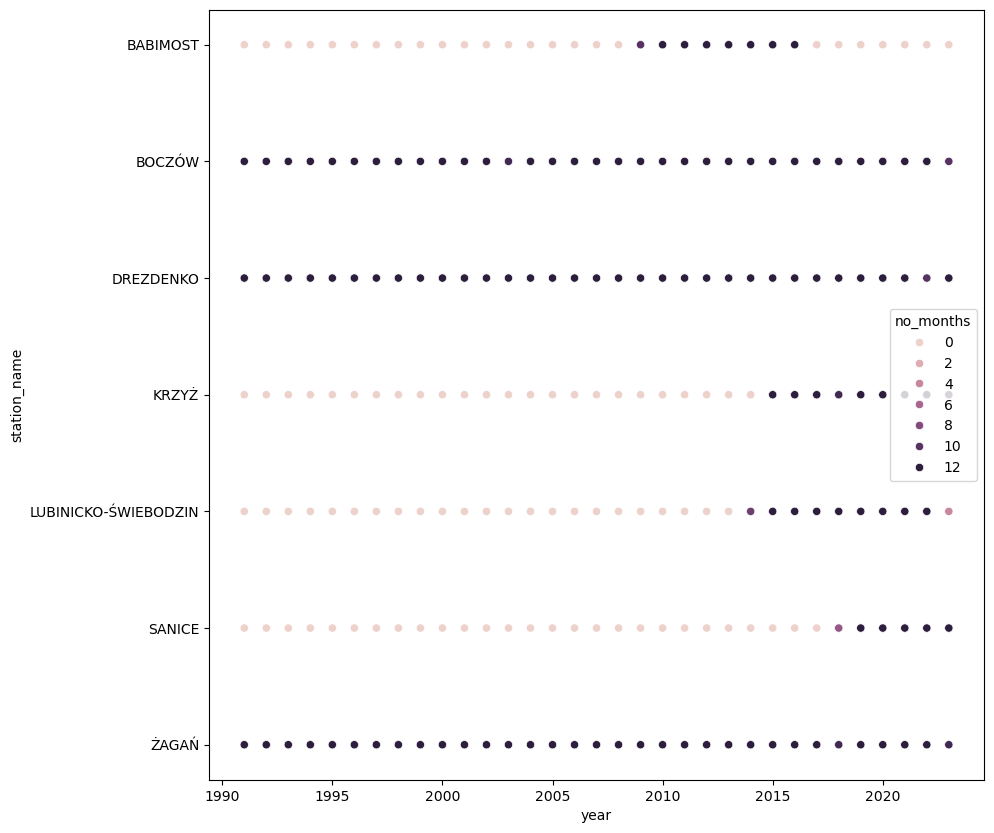

In [70]:
pivot_table = merged_gdf.pivot_table(
    index="year", columns="station_name", aggfunc="count"
)["24h_precipitation_mm"].fillna(0)
# pivot_table
pivot_table_normalized = pivot_table.map(lambda x: int(min(x / 12, 12))).reset_index()
# pivot_table_normalized
pivot_table_normalized_melted = pivot_table_normalized.melt(
    id_vars=["year"], value_name="no_months"
)
# pivot_table_normalized_melted

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.scatterplot(
    pivot_table_normalized_melted, x="year", y="station_name", hue="no_months", ax=ax
)

plt.show()